In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

from gpts import GPTMini6
from preprocess_corpus import load_document, make_char2ind_map, make_seqs_and_labels

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load the document and create the char2ind map
corpus, vocab = load_document(path2data = 'data/LOTR.txt')
char2ind_map = make_char2ind_map(vocab)

# Define sequence and labels
seq_len = 250
seqs, labels = make_seqs_and_labels(corpus, char2ind_map, seq_len=seq_len)

# Add padding character to the char2ind map
padding_char = '#'
next_available_index = len(char2ind_map)
char2ind_map[padding_char] = next_available_index

# Split data
seqs_train, seqs_val = seqs[200:], seqs[:200]
labels_train, labels_val = labels[200:], labels[:200]

# Set vocab size and padding character encoding
vocab_sz = len(char2ind_map)
padding_char_enc = char2ind_map['#']

# Train
minigpt = GPTMini6(vocab_sz=vocab_sz, seq_len=seq_len, padding_char_enc=padding_char_enc)
minigpt.compile(loss='temporal_cross_entropy')
train_loss_hist, val_loss_hist, _, _ = minigpt.fit(seqs_train, labels_train, seqs_val, labels_val, batch_size=64, patience=15, max_epochs=28, lr_max_decays=3, lr_patience=9)

2025-05-14 02:32:53.669056: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20601 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 250, 88]
TransformerBlock_5:
	TransformerBlock_5/MLP:
	Dropout layer output(TransformerBlock_5/MLP/dropout) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_5/MLP/dense_1) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_5/MLP/dense_0) shape: [1, 250, 1536]
	TransformerBlock_5/multihead_attention:
	Dropout layer output(TransformerBlock_5/multihead_attention/dropout) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_5/multihead_attention/dense_1) shape: [1, 250, 384]
	TransformerBlock_5/multihead_attention/attention:
	Dropout layer output(TransformerBlock_5/multihead_attention/attention/dropout) shape: [1, 6, 250, 250]
	TransformerBlock_5/multihead_attention/qkv_block:
	Dense layer output(TransformerBlock_5/multihead_attention/qkv_block/dense_v) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_5/multihead_attention/qkv_block/dense_k) shape:

Tensor("Reshape_32:0", shape=(64, 250), dtype=float32)


Tensor("Reshape_32:0", shape=(64, 250), dtype=float32)


I0000 00:00:1747190013.659281     715 service.cc:145] XLA service 0x7bb4c8ce8800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747190013.659323     715 service.cc:153]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9


2025-05-14 02:33:34.143559: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


2025-05-14 02:33:34.952785: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90400


I0000 00:00:1747190015.809923     715 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Tensor("Reshape_32:0", shape=(64, 250), dtype=float32)


Epoch 1: Training Loss = 3.1157, Validation Loss = 3.0936, Validation Accuracy = 0.1931
Epoch 1/28 took 115.6613 seconds


Epoch 2: Training Loss = 2.7785, Validation Loss = 2.6051, Validation Accuracy = 0.2723
Epoch 2/28 took 79.1418 seconds


Epoch 3: Training Loss = 2.4560, Validation Loss = 2.4684, Validation Accuracy = 0.2976
Epoch 3/28 took 79.1192 seconds


Epoch 4: Training Loss = 2.2298, Validation Loss = 2.1656, Validation Accuracy = 0.3834
Epoch 4/28 took 79.1173 seconds


Epoch 5: Training Loss = 1.9935, Validation Loss = 1.9192, Validation Accuracy = 0.4517
Epoch 5/28 took 79.1038 seconds


Epoch 6: Training Loss = 1.7722, Validation Loss = 1.7697, Validation Accuracy = 0.4926
Epoch 6/28 took 79.1074 seconds


Epoch 7: Training Loss = 1.6173, Validation Loss = 1.6612, Validation Accuracy = 0.5194
Epoch 7/28 took 79.1071 seconds


Epoch 8: Training Loss = 1.5149, Validation Loss = 1.5765, Validation Accuracy = 0.5387
Epoch 8/28 took 79.1150 seconds


Epoch 9: Training Loss = 1.4438, Validation Loss = 1.5289, Validation Accuracy = 0.5542
Epoch 9/28 took 79.1106 seconds


Epoch 10: Training Loss = 1.3932, Validation Loss = 1.4858, Validation Accuracy = 0.5618
Epoch 10/28 took 79.1011 seconds


Epoch 11: Training Loss = 1.3533, Validation Loss = 1.4514, Validation Accuracy = 0.5731
Epoch 11/28 took 79.1210 seconds


Epoch 12: Training Loss = 1.3210, Validation Loss = 1.4281, Validation Accuracy = 0.5787
Epoch 12/28 took 79.1032 seconds


Epoch 13: Training Loss = 1.2936, Validation Loss = 1.3983, Validation Accuracy = 0.5854
Epoch 13/28 took 79.1033 seconds


Epoch 14: Training Loss = 1.2685, Validation Loss = 1.3792, Validation Accuracy = 0.5878
Epoch 14/28 took 79.1269 seconds


Epoch 15: Training Loss = 1.2482, Validation Loss = 1.3760, Validation Accuracy = 0.5922
Epoch 15/28 took 79.0998 seconds


Epoch 16: Training Loss = 1.2309, Validation Loss = 1.3559, Validation Accuracy = 0.5970
Epoch 16/28 took 79.1081 seconds


Epoch 17: Training Loss = 1.2172, Validation Loss = 1.3511, Validation Accuracy = 0.5996
Epoch 17/28 took 79.0827 seconds


Epoch 18: Training Loss = 1.2016, Validation Loss = 1.3327, Validation Accuracy = 0.6024
Epoch 18/28 took 79.1128 seconds


Epoch 19: Training Loss = 1.1892, Validation Loss = 1.3189, Validation Accuracy = 0.6064
Epoch 19/28 took 79.1256 seconds


Epoch 20: Training Loss = 1.1774, Validation Loss = 1.3172, Validation Accuracy = 0.6087
Epoch 20/28 took 79.0716 seconds


Epoch 21: Training Loss = 1.1656, Validation Loss = 1.3058, Validation Accuracy = 0.6119
Epoch 21/28 took 79.1078 seconds


Epoch 22: Training Loss = 1.1569, Validation Loss = 1.3024, Validation Accuracy = 0.6130
Epoch 22/28 took 79.1080 seconds


Epoch 23: Training Loss = 1.1463, Validation Loss = 1.2966, Validation Accuracy = 0.6152
Epoch 23/28 took 79.1012 seconds


Epoch 24: Training Loss = 1.1389, Validation Loss = 1.2942, Validation Accuracy = 0.6177
Epoch 24/28 took 79.1190 seconds


Epoch 25: Training Loss = 1.1300, Validation Loss = 1.2857, Validation Accuracy = 0.6198
Epoch 25/28 took 79.1065 seconds


Epoch 26: Training Loss = 1.1206, Validation Loss = 1.2875, Validation Accuracy = 0.6179
Epoch 26/28 took 79.1144 seconds


Epoch 27: Training Loss = 1.1131, Validation Loss = 1.2714, Validation Accuracy = 0.6211
Epoch 27/28 took 79.1067 seconds


Epoch 28: Training Loss = 1.1048, Validation Loss = 1.2668, Validation Accuracy = 0.6225
Epoch 28/28 took 79.1223 seconds
Finished training after 28 epochs!


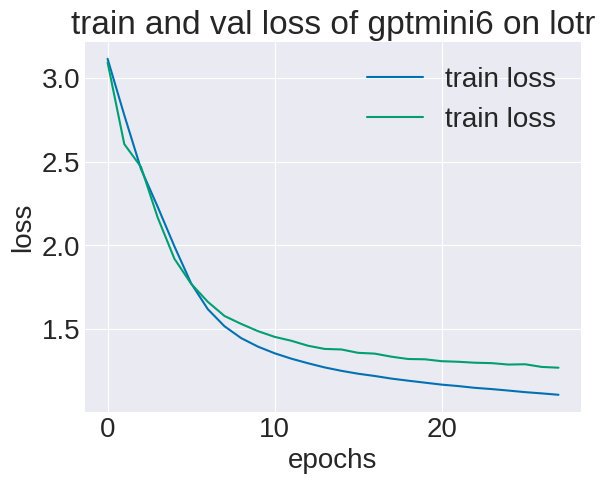

In [5]:
epochs = np.arange(len(train_loss_hist))
plt.plot(epochs, train_loss_hist, label = "train loss")
plt.plot(epochs, val_loss_hist, label = "train loss")
plt.title("train and val loss of gptmini6 on lotr")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

I would have liked to train this longer but it kept crashing from storage issues or something,maybe smaller batch size would have helped

In [6]:
from addition_dataset import make_ind2char_mapping
ind2char_map = make_ind2char_mapping(char2ind_map)
prompt = "When first the dawning breath of spring awoke, I saw"
gen_text = minigpt.generate_sequence(prompt, 5000, char2ind_map, ind2char_map , method = None)


print("***final output***")
print(''.join(gen_text))

When first the dawning breath of spring awoke, I saw 

you 

spe

akin

g Fr

odo 

comm

and

 to 

Mina

s Ti

rith

. It

 is 

said

 not

hing

; bu

t so

 he 

did 

not 

find

. It

 was

 a 

figh

t st

rang

e ch

anc

e.'


 Sha

grat

 ask

ed i

t wi

th a

 gre

y cr

y, f

or s

ome 

stra

nge 

wet,

 had

 sli

pped

 in 

clou

d, a

nd S

am d

id n

ot k

now 

that

 he 

did 

not 

call

ed t

hem 

like

 a s

oft 

dark

 fir

e; a

ll t

he a

fter

noon

 was

 so 

desi

re; 

and 

heed

less

 blo

w fo

r a 

frag

ment

 whi

le a

ll t

he g

reat

 hal

l to

ne 

woul

d be

 ful

l of

 his

 own

 hou

se t

o b

eat 

or h

is s

ide.

 The

 upp

er g

rowt

h fe

rn, 

ladd

er b

roa

der

, sa

ve a

nd f

uge 

down

 up 

the 

wate

rs, 

and 

gazi

ng w

itho

ut s

ecre

ted 

and 

gone

.
  

Sam'

s he

ad w

as a

cros

s th

e wi

zar

d's 

effo

rt h

alf 

for 

a lo

ng s

Frod

o's 

spur

. Th

ere 

was 

a wo

oden

 hob

bit 

that

 too

k t

he l

east

 win

gs o

f re

scue

l, a

nd b

etwe

en t

he W

est 

Took

-El

ven'

s go

od-b

ye t

ime.

 The

ns n

ow g

ave 

no l

onge

r of

 lis

teni

ng i

n th

is w

ar t

han

 we 

wish

. Bu

t be

yond

 Min

as T

irit

h Un

derh

ill 

less

 in 

Ort

hanc

, bu

t yo

u fr

iend

s ha

ve w

ans

 thi

ngs 

that

 cou

ld m

ust 

ligh

tly 

be a

 sha

ft n

ot p

lace

.'
 

   '

Go o

n,' 

said

 Gan

dalf

. `C

ome 

to 

the 

bask

 of 

good

 and

 a b

reec

h fo

lk. 

Sam 

I sh

all 

chie

fly.

 He 

woul

d li

ke a

 lea

f an

d lo

oked

 ove

r th

e Ri

ng a

nd t

road

. No

t co

mman

d co

mman

ds,

 un

lock

ing 

the 

tree

s, 

dra

ggi

ng 

on a

s fa

r as

 he 

coul

d se

e th

e Sh

ire,

 or 

some

how 

we s

ee h

im i

n yo

ur p

eril

. Al

l th

e la

st w

all 

of a

ll t

hat 

were

 sma

ller

 of 

an e

ye, 

if 

desp

air 

felt

 it,

 it 

will

 fol

low 

to b

e li

sten

ing,

 we 

hear

d no

t se

e th

e ne

w fo

rebo

ded 

was 

a br

oken

 dar

k in

 fro

nt; 

but 

it's

 tha

t ta

le o

ften

 mor

e, w

here

 the

y qu

ickl

y gl

ance

d to

 bri

ng a

 lar

ge u

ncou

ntry

.'
 

It w

as a

n au

sue 

thi

s s

tro

ng 

and

 ho

le u

pon

 th

e f

urn

ishm

ent

; bu

t t

here

 was

 a t

rick

 han

ds, 

of w

hit

e ye

ars 

and 

hear

ns f

In [3]:
from addition_dataset import make_ind2char_mapping
ind2char_map = make_ind2char_mapping(char2ind_map)
prompt = "Frodo did not approve that Mary and Pippen could not stop drinking"
gen_text = minigpt.generate_sequence(prompt, 500, char2ind_map, ind2char_map , method = None)


print("***final output***")
print(''.join(gen_text))

2025-05-14 03:13:09.693998: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-14 03:13:10.254007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747192390.458746     369 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747192390.512127     369 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-14 03:13:10.994738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

NameError: name 'char2ind_map' is not defined